1. Differences between AI, ML, DL, DS

- Artificial Intelligence (AI): Big umbrella—build systems that act intelligently (reasoning, planning, perception, language, robotics).

- Machine Learning (ML): Subset of AI—algorithms learn patterns from data to make predictions/decisions.

- Deep Learning (DL): Subset of ML—neural networks with many layers that learn complex features automatically (images, speech, NLP).

- Data Science (DS): End-to-end practice—collect, clean, explore, model, and communicate insights from data (uses statistics + ML + engineering + domain knowledge).

2. Types of machine learning (with 1 example each)

- Supervised learning: Learn from labeled data (X → y).
  - Example: Predict house prices from features (regression); classify spam emails (classification).

- Unsupervised learning: Find structure in unlabeled data.
  - Example: Customer segmentation with K-Means.

- Semi-supervised learning: Train with a small set of labels + many unlabeled points.
  - Example: Classifying webpages where only a few are labeled.

- Reinforcement learning: Agent learns by interacting with an environment to maximize reward.
  - Example: A robot learning to walk; game-playing agents (e.g., chess).

3. Overfitting, Underfitting, Bias–Variance tradeoff

- Overfitting: Model learns noise; great on train, poor on test (too complex, high variance).

- Underfitting: Model too simple; poor on both train and test (high bias).

- Bias–Variance tradeoff: Increasing model complexity usually lowers bias but raises variance; goal is a sweet spot with low total error (good generalization).

4. Outliers + three handling techniques

- Outliers: Unusually large/small values relative to the rest of the data.
Three common ways to handle them:

  - IQR rule: cap/remove values outside
[𝑄1−1.5⋅𝐼𝑄𝑅,  𝑄3+1.5⋅𝐼𝑄𝑅].

  - Z-score filtering: flag values with ∣z∣>3 (or chosen threshold).

- Winsorization/Capping: replace extremes with chosen percentiles (e.g., 1st/99th).
(Other options: transform—log, Box-Cox; robust models; Isolation Forest.)

5. Handling missing values (+ one imputation each)

- Process: detect → quantify → understand mechanism (MCAR/MAR/MNAR) → decide (drop vs. impute) → fit imputer on train only → transform train/test consistently → document.

- Numeric imputation (one choice): median imputation (robust to outliers).

- Categorical imputation (one choice): fill with mode or add an "Unknown" category.

In [1]:
#6. Write a Python program that:
# ● Creates a synthetic imbalanced dataset with make_classification() from
# sklearn.datasets.
# ● Prints the class distribution.
from sklearn.datasets import make_classification
import numpy as np

X, y = make_classification(n_samples=1000, n_features=10, n_informative=4,
                           n_redundant=2, weights=[0.95, 0.05],
                           n_clusters_per_class=1, flip_y=0.01, random_state=42)
(unique, counts) = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))



{np.int64(0): np.int64(942), np.int64(1): np.int64(58)}


In [2]:
#7. Implement one-hot encoding using pandas for the following list of colors:
# ['Red', 'Green', 'Blue', 'Green', 'Red']. Print the resulting dataframe.
import pandas as pd
colors = ['Red', 'Green', 'Blue', 'Green', 'Red']
one_hot = pd.get_dummies(pd.Series(colors, name="Color"), prefix='Color')
print(one_hot)


   Color_Blue  Color_Green  Color_Red
0       False        False       True
1       False         True      False
2        True        False      False
3       False         True      False
4       False        False       True


Missing before: 50
Missing after: 0
Mean used: -0.04208369455948478


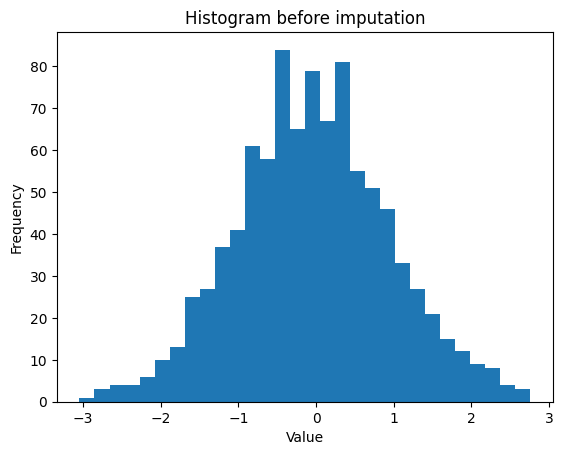

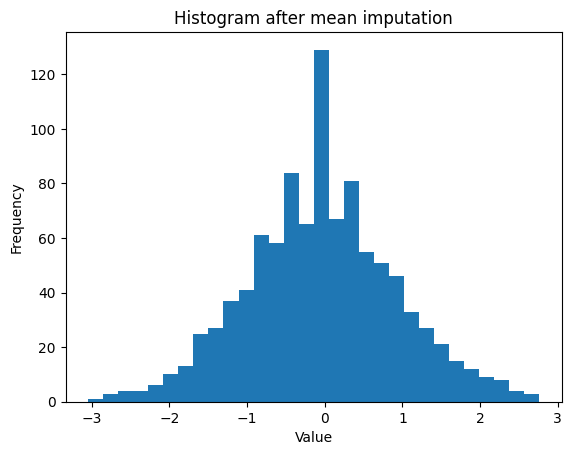

In [3]:
# 8. Write a Python script to:
# ● Generate 1000 samples from a normal distribution.
# ● Introduce 50 random missing values.
# ● Fill missing values with the column mean.
# ● Plot a histogram before and after imputation.
# (Include your Python code and output in the code box below.)
import numpy as np, matplotlib.pyplot as plt

np.random.seed(0)
data = np.random.normal(0, 1, 1000)
idx = np.random.choice(np.arange(1000), 50, replace=False)
data_nan = data.copy(); data_nan[idx] = np.nan

mean_val = np.nanmean(data_nan)
data_imp = data_nan.copy(); data_imp[np.isnan(data_imp)] = mean_val

print("Missing before:", np.isnan(data_nan).sum())
print("Missing after:", np.isnan(data_imp).sum())
print("Mean used:", float(mean_val))

plt.figure(); plt.hist(data_nan[~np.isnan(data_nan)], bins=30)
plt.title("Histogram before imputation"); plt.xlabel("Value"); plt.ylabel("Frequency"); plt.show()

plt.figure(); plt.hist(data_imp, bins=30)
plt.title("Histogram after mean imputation"); plt.xlabel("Value"); plt.ylabel("Frequency"); plt.show()


In [4]:
# 9. Implement Min-Max scaling on the following list of numbers [2, 5, 10, 15,
# 20] using sklearn.preprocessing.MinMaxScaler. Print the scaled array.
from sklearn.preprocessing import MinMaxScaler
import numpy as np

arr = np.array([[2],[5],[10],[15],[20]])
scaled = MinMaxScaler().fit_transform(arr)
print(scaled.flatten())


[0.         0.16666667 0.44444444 0.72222222 1.        ]


10. You are working as a data scientist for a retail company. You receive a customer
transaction dataset that contains:
● Missing ages,
● Outliers in transaction amount,
● A highly imbalanced target (fraud vs. non-fraud),
● Categorical variables like payment method.
Explain the step-by-step data preparation plan you’d follow before training a machine learning
model. Include how you’d address missing data, outliers, imbalance, and encoding.
 - 1. Split first (prevent leakage): train/validation/test with stratification on fraud label; if time-ordered, use time-based split.

 - 2. EDA & sanity checks: class balance, missingness map, variable types, ranges. Use robust summaries (median/IQR) for amounts.

 - 3. Missing ages:

     - Inspect pattern by features (e.g., age missing more in a payment type?).

     - Simple baseline: median age by customer segment (e.g., by gender/region).

     - Advanced: model-based imputation (e.g., KNN or iterative imputer). Add an “age_missing” flag.

  - 4. Outliers in transaction amount:

     - Visualize (hist, boxplot).

     - Log-transform amounts (amount’ = log(1 + amount)).

     - Cap/winsorize at, say, 1st/99th percentiles on the training set only; keep the capping params to apply to val/test.

     - Consider RobustScaler instead of StandardScaler.

   - 5. Imbalanced target (fraud vs non-fraud):

     - Use stratified CV, appropriate metrics (PR-AUC, ROC-AUC, F1, recall at fixed precision).

     - Try class_weight='balanced' (tree/linear models).

     - Try resampling on the training folds only: SMOTE / RandomUnderSampler or a combo (SMOTEENN).

     - Calibrate threshold for business goal (e.g., maximize recall at 95% precision).

  - 6. Categorical variables (e.g., payment method):

     - Low cardinality: one-hot encode.

     - High cardinality: target encoding or leave-one-out (with CV to avoid leakage).

      - Keep an “Unknown” bucket for rare/new categories.

  - 7. Feature scaling:

     - Scale numeric features (StandardScaler or RobustScaler post-log).

     - Don’t scale tree models if not needed, but keep consistent preprocessing via a pipeline.

  - 8. Pipelines to avoid leakage:

     - Use ColumnTransformer + Pipeline to chain: imputation → encoding/scaling → model.

     - Fit all transformers only on training data; apply to val/test.

  - 9. Modeling & tuning:

     - Start with baseline (Logistic Regression, XGBoost/LightGBM).

     - Hyper-tune with stratified CV; evaluate with chosen metrics; monitor feature importance/SHAP.

  - 10. Finalize & monitor:

     - Retrain on train+val with best pipeline, evaluate on hold-out test; save pipeline; set up drift/threshold monitoring.